Import libraries

In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



Load dataset

In [428]:

df = pd.read_csv("covid_19_india.csv")
df.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


 Basic info 

In [429]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Shape: (18110, 9)

Columns: Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

Missing values:
 Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Data types:
 Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object


Data Cleaning

In [430]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['ConfirmedIndianNational'] = pd.to_numeric(df['ConfirmedIndianNational'], errors='coerce').fillna(0).astype(int)
df['ConfirmedForeignNational'] = pd.to_numeric(df['ConfirmedForeignNational'], errors='coerce').fillna(0).astype(int)

# Drop redundant column
df = df.drop(columns=['Sno'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      18110 non-null  datetime64[ns]
 1   Time                      18110 non-null  object        
 2   State/UnionTerritory      18110 non-null  object        
 3   ConfirmedIndianNational   18110 non-null  int64         
 4   ConfirmedForeignNational  18110 non-null  int64         
 5   Cured                     18110 non-null  int64         
 6   Deaths                    18110 non-null  int64         
 7   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 1.1+ MB


Descriptive Statistics

In [431]:
df[['Confirmed', 'Deaths', 'Cured']].describe()


,Confirmed,Deaths,Cured
count,1.811000e+04,18110.000000,1.811000e+04
mean,3.010314e+05,4052.402264,2.786375e+05
std,6.561489e+05,10919.076411,6.148909e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,4.376750e+03,32.000000,3.360250e+03
50%,3.977350e+04,588.000000,3.336400e+04
75%,3.001498e+05,3643.750000,2.788698e+05
max,6.363442e+06,134201.000000,6.159676e+06


Univariate Analysis (Distributions)

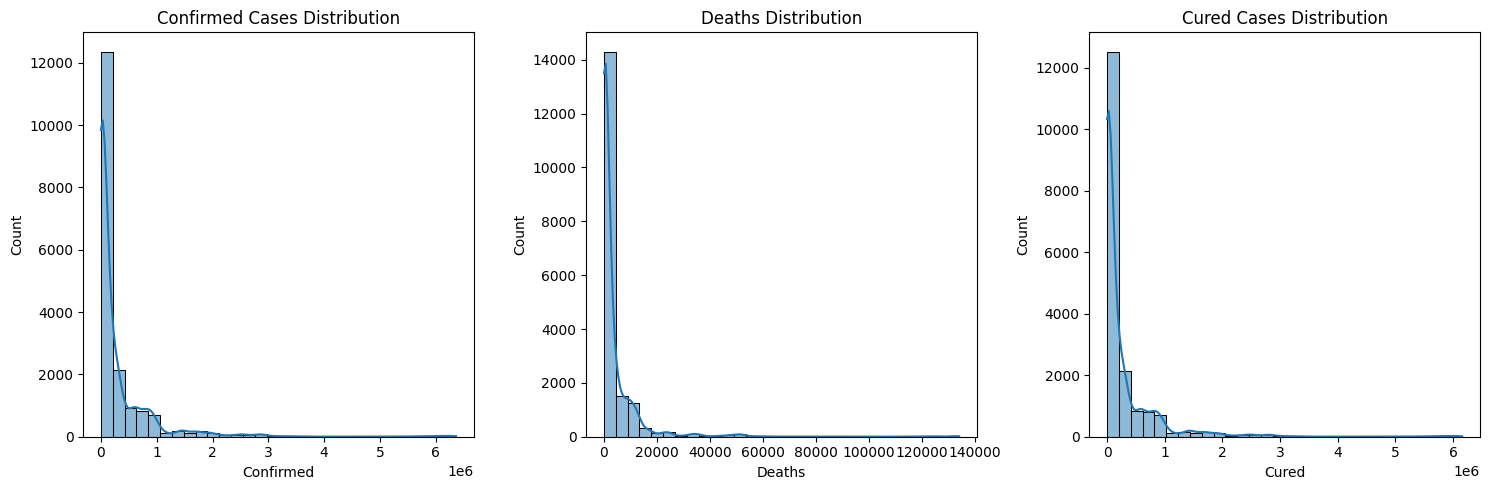

In [432]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df['Confirmed'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Confirmed Cases Distribution")

sns.histplot(df['Deaths'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Deaths Distribution")

sns.histplot(df['Cured'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Cured Cases Distribution")

plt.tight_layout()
plt.show()


Correlation Heatmap

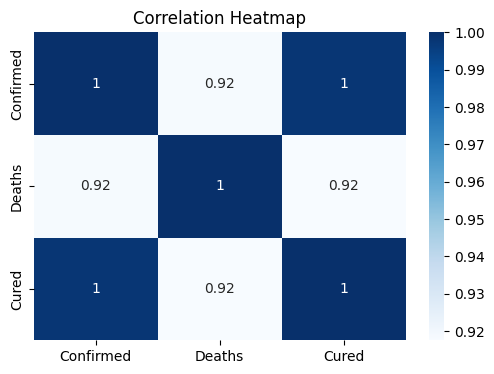

In [433]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Confirmed','Deaths','Cured']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


Trend over time (India total)

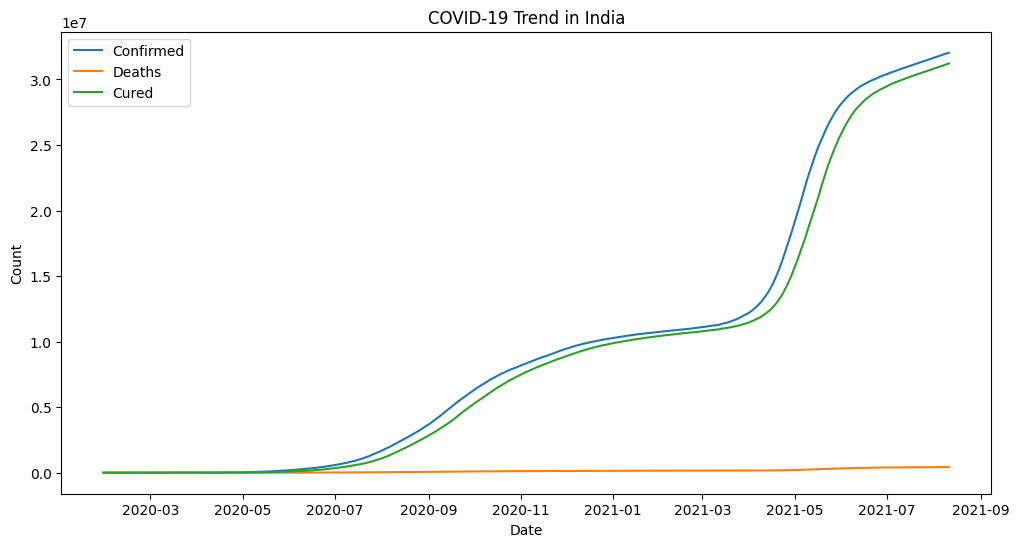

In [434]:
daily = df.groupby("Date")[['Confirmed','Deaths','Cured']].sum()

plt.figure(figsize=(12,6))
plt.plot(daily.index, daily['Confirmed'], label="Confirmed")
plt.plot(daily.index, daily['Deaths'], label="Deaths")
plt.plot(daily.index, daily['Cured'], label="Cured")
plt.legend()
plt.title("COVID-19 Trend in India")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()


Top 10 States by Confirmed Cases

/var/folders/k9/0ymr366x2c5c2hpzhnpzt0100000gn/T/ipykernel_7573/3843380421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="Reds_r")


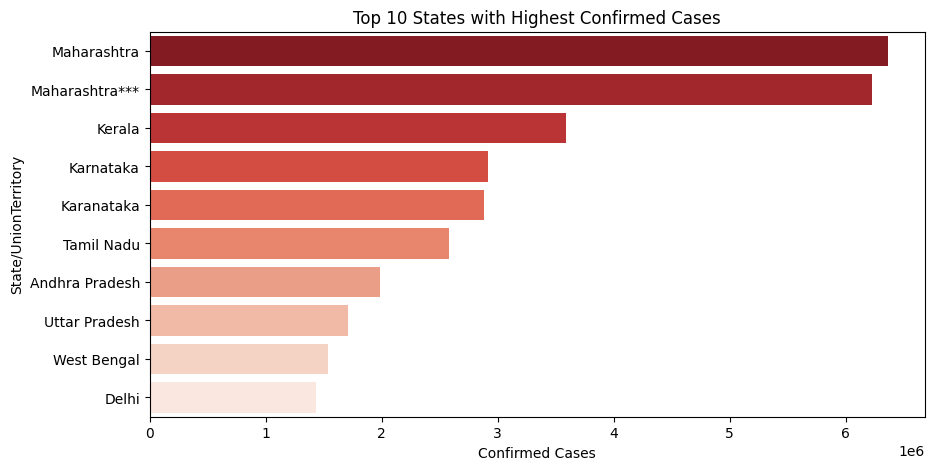

In [435]:
top_states = df.groupby("State/UnionTerritory")['Confirmed'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_states.values, y=top_states.index, palette="Reds_r")
plt.title("Top 10 States with Highest Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.show()


Outlier Detection (Boxplots)

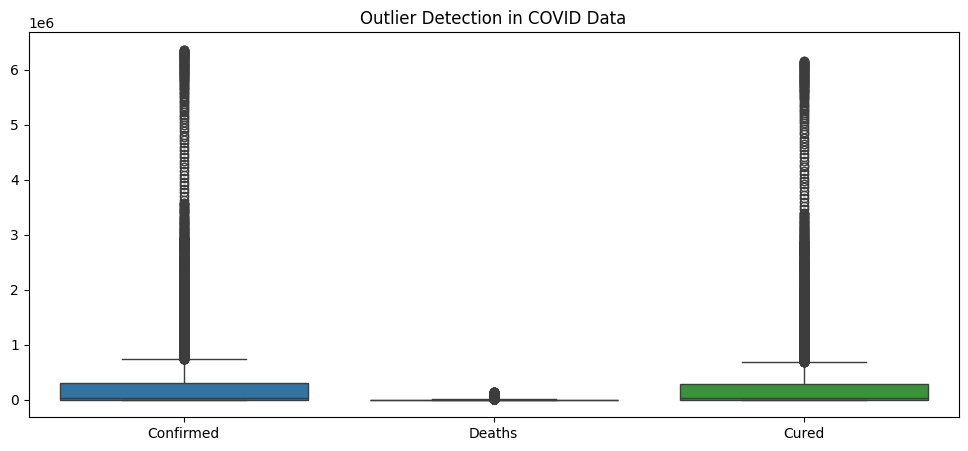

In [436]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['Confirmed','Deaths','Cured']])
plt.title("Outlier Detection in COVID Data")
plt.show()


 log transformation to reduce skewness

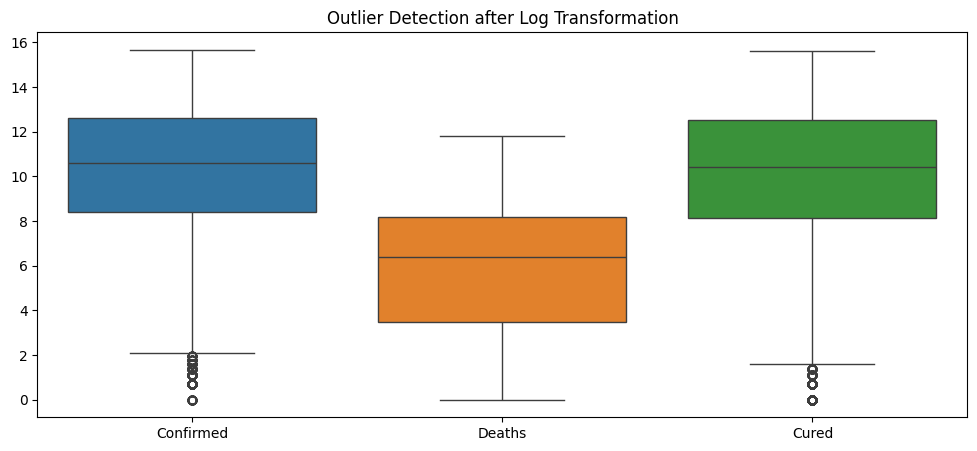

In [437]:
df[['Confirmed','Deaths','Cured']] = df[['Confirmed','Deaths','Cured']].apply(lambda x: np.log1p(x))
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['Confirmed','Deaths','Cured']])
plt.title("Outlier Detection after Log Transformation")
plt.show()
